<a href="https://colab.research.google.com/github/sujataprasad01/ML-Random-Forest-Regression/blob/main/Random_Forest_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.preprocessing import StandardScaler

# Importing dataset

In [3]:
df=pd.read_csv("https://raw.githubusercontent.com/mk-gurucharan/Regression/master/IceCreamData.csv")

In [8]:
df.head()

,Temperature,Revenue
0,24.566884,534.799028
1,26.005191,625.190122
2,27.790554,660.632289
3,20.595335,487.706960
4,11.503498,316.240194


# Data Analysis (EDA, DM, DC, DE, DV)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Temperature  500 non-null    float64
 1   Revenue      500 non-null    float64
dtypes: float64(2)
memory usage: 7.9 KB


# Assigning features and target

In [4]:
X= np.array(df.Temperature.values)
Y= np.array(df.Revenue.values)

# Splitting the dataset

In [5]:
X_train, X_test, Y_train, Y_test= train_test_split(X,Y, test_size=0.05)

# Model Selection

In [6]:
from sklearn.ensemble import RandomForestRegressor

In [7]:
regressor=RandomForestRegressor(n_estimators=10, random_state=0)

# Training the model

In [8]:
regressor.fit(X_train.reshape(-1,1), Y_train.reshape(-1,1))

<ipython-input-8-e05256371746>:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  regressor.fit(X_train.reshape(-1,1), Y_train.reshape(-1,1))


RandomForestRegressor(n_estimators=10, random_state=0)

# testing a model

In [9]:
y_pred=regressor.predict(X_test.reshape(-1,1))

In [10]:
pred=pd.DataFrame({'Actual': Y_test.reshape(-1), 'Predicted': y_pred.reshape(-1)})

In [11]:
pred.head()

,Actual,Predicted
0,498.757050,431.209240
1,344.688765,309.061084
2,542.608070,565.573728
3,249.884252,197.543607
4,432.819795,427.109692


Text(0, 0.5, 'Revenue')

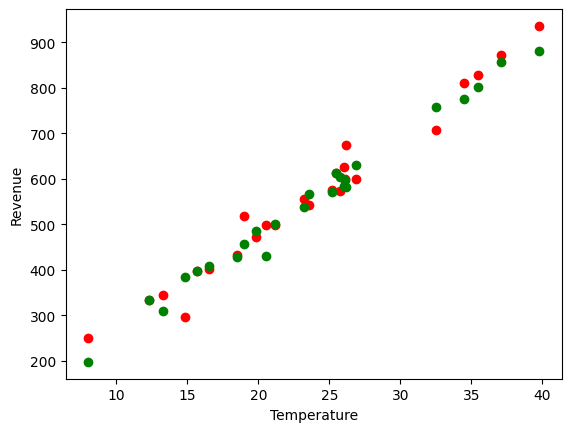

In [14]:
plt.scatter(X_test, Y_test, color='red')
plt.scatter(X_test, y_pred, color='green')
plt.xlabel('Temperature')
plt.ylabel('Revenue')

<Axes: >

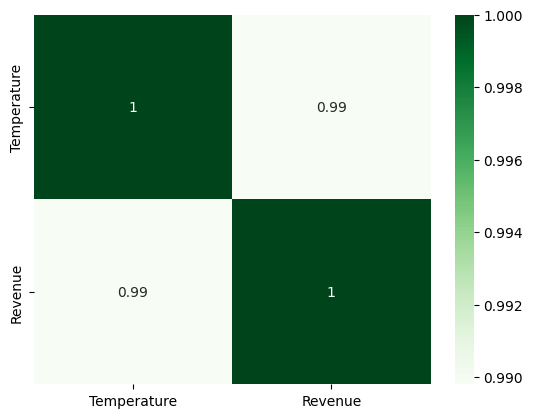

In [19]:
sns.heatmap(df.corr(), annot=True, cmap='Greens')

In [21]:
r2_score(Y_test, y_pred)

0.9468499606073241

# Prediction of used cars

In [32]:
df=pd.read_csv("https://raw.githubusercontent.com/sahilrahman12/Price_prediction_of_used_Cars_-Predictive_Analysis-/master/car_data.csv")

In [23]:
df

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner
...,...,...,...,...,...,...,...,...
4335,Hyundai i20 Magna 1.4 CRDi (Diesel),2014,409999,80000,Diesel,Individual,Manual,Second Owner
4336,Hyundai i20 Magna 1.4 CRDi,2014,409999,80000,Diesel,Individual,Manual,Second Owner
4337,Maruti 800 AC BSIII,2009,110000,83000,Petrol,Individual,Manual,Second Owner
4338,Hyundai Creta 1.6 CRDi SX Option,2016,865000,90000,Diesel,Individual,Manual,First Owner


In [33]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import LabelEncoder

In [34]:
df['transmission']=LabelEncoder().fit_transform(df['transmission'])
df['owner']=LabelEncoder().fit_transform(df['owner'])
df['fuel']=LabelEncoder().fit_transform(df['fuel'])
df['seller_type']=LabelEncoder().fit_transform(df['seller_type'])

In [36]:
from datetime import date

In [37]:
date=date.today().year

In [38]:
no_of_years=[]
for i in (df['year']):
  li=date-i
  no_of_years.append(li)

In [39]:
no_of_years

[17,
 17,
 12,
 7,
 10,
 17,
 8,
 10,
 9,
 7,
 9,
 10,
 6,
 17,
 17,
 12,
 7,
 10,
 17,
 8,
 10,
 9,
 7,
 9,
 10,
 6,
 9,
 5,
 11,
 10,
 11,
 6,
 13,
 6,
 6,
 11,
 12,
 13,
 8,
 9,
 5,
 14,
 10,
 11,
 15,
 12,
 10,
 10,
 10,
 12,
 15,
 15,
 5,
 18,
 7,
 6,
 6,
 6,
 8,
 10,
 12,
 28,
 10,
 11,
 19,
 10,
 10,
 15,
 15,
 14,
 13,
 7,
 6,
 17,
 15,
 10,
 18,
 7,
 6,
 17,
 14,
 10,
 19,
 10,
 9,
 5,
 8,
 9,
 7,
 7,
 9,
 11,
 17,
 11,
 10,
 9,
 11,
 7,
 11,
 11,
 15,
 6,
 7,
 6,
 16,
 12,
 7,
 14,
 7,
 6,
 5,
 7,
 12,
 14,
 13,
 7,
 8,
 10,
 8,
 10,
 17,
 10,
 11,
 20,
 6,
 17,
 12,
 12,
 8,
 8,
 8,
 14,
 12,
 9,
 9,
 7,
 9,
 26,
 12,
 9,
 13,
 21,
 8,
 19,
 11,
 9,
 6,
 9,
 8,
 22,
 6,
 17,
 16,
 12,
 9,
 12,
 8,
 10,
 4,
 9,
 13,
 10,
 11,
 14,
 11,
 7,
 13,
 13,
 8,
 9,
 12,
 13,
 11,
 18,
 5,
 17,
 4,
 20,
 11,
 8,
 9,
 6,
 6,
 15,
 15,
 6,
 5,
 21,
 8,
 7,
 19,
 11,
 17,
 12,
 14,
 13,
 15,
 15,
 18,
 7,
 12,
 12,
 9,
 10,
 7,
 11,
 10,
 6,
 11,
 10,
 8,
 6,
 7,
 5,
 8,
 9,
 7,
 12,
 11

In [40]:
df['no_of_years']=no_of_years

In [41]:
df.drop(['name', 'year'], axis=1, inplace=True)

In [42]:
df

,selling_price,km_driven,fuel,seller_type,transmission,owner,no_of_years
0,60000,70000,4,1,1,0,17
1,135000,50000,4,1,1,0,17
2,600000,100000,1,1,1,0,12
3,250000,46000,4,1,1,0,7
4,450000,141000,1,1,1,2,10
...,...,...,...,...,...,...,...
4335,409999,80000,1,1,1,2,10
4336,409999,80000,1,1,1,2,10
4337,110000,83000,4,1,1,2,15
4338,865000,90000,1,1,1,0,8


In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4340 entries, 0 to 4339
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   selling_price  4340 non-null   int64
 1   km_driven      4340 non-null   int64
 2   fuel           4340 non-null   int64
 3   seller_type    4340 non-null   int64
 4   transmission   4340 non-null   int64
 5   owner          4340 non-null   int64
 6   no_of_years    4340 non-null   int64
dtypes: int64(7)
memory usage: 237.5 KB


In [44]:
df.shape

(4340, 7)

In [45]:
df.corr()

,selling_price,km_driven,fuel,seller_type,transmission,owner,no_of_years
selling_price,1.000000,-0.192289,-0.269653,-0.151554,-0.530205,-0.207840,-0.413922
km_driven,-0.192289,1.000000,-0.286095,0.113689,0.120226,0.297115,0.419688
fuel,-0.269653,-0.286095,1.000000,0.038797,0.039249,-0.010910,0.120002
seller_type,-0.151554,0.113689,0.038797,1.000000,0.174925,0.165681,0.098352
transmission,-0.530205,0.120226,0.039249,0.174925,1.000000,0.078893,0.143800
owner,-0.207840,0.297115,-0.010910,0.165681,0.078893,1.000000,0.414705
no_of_years,-0.413922,0.419688,0.120002,0.098352,0.143800,0.414705,1.000000


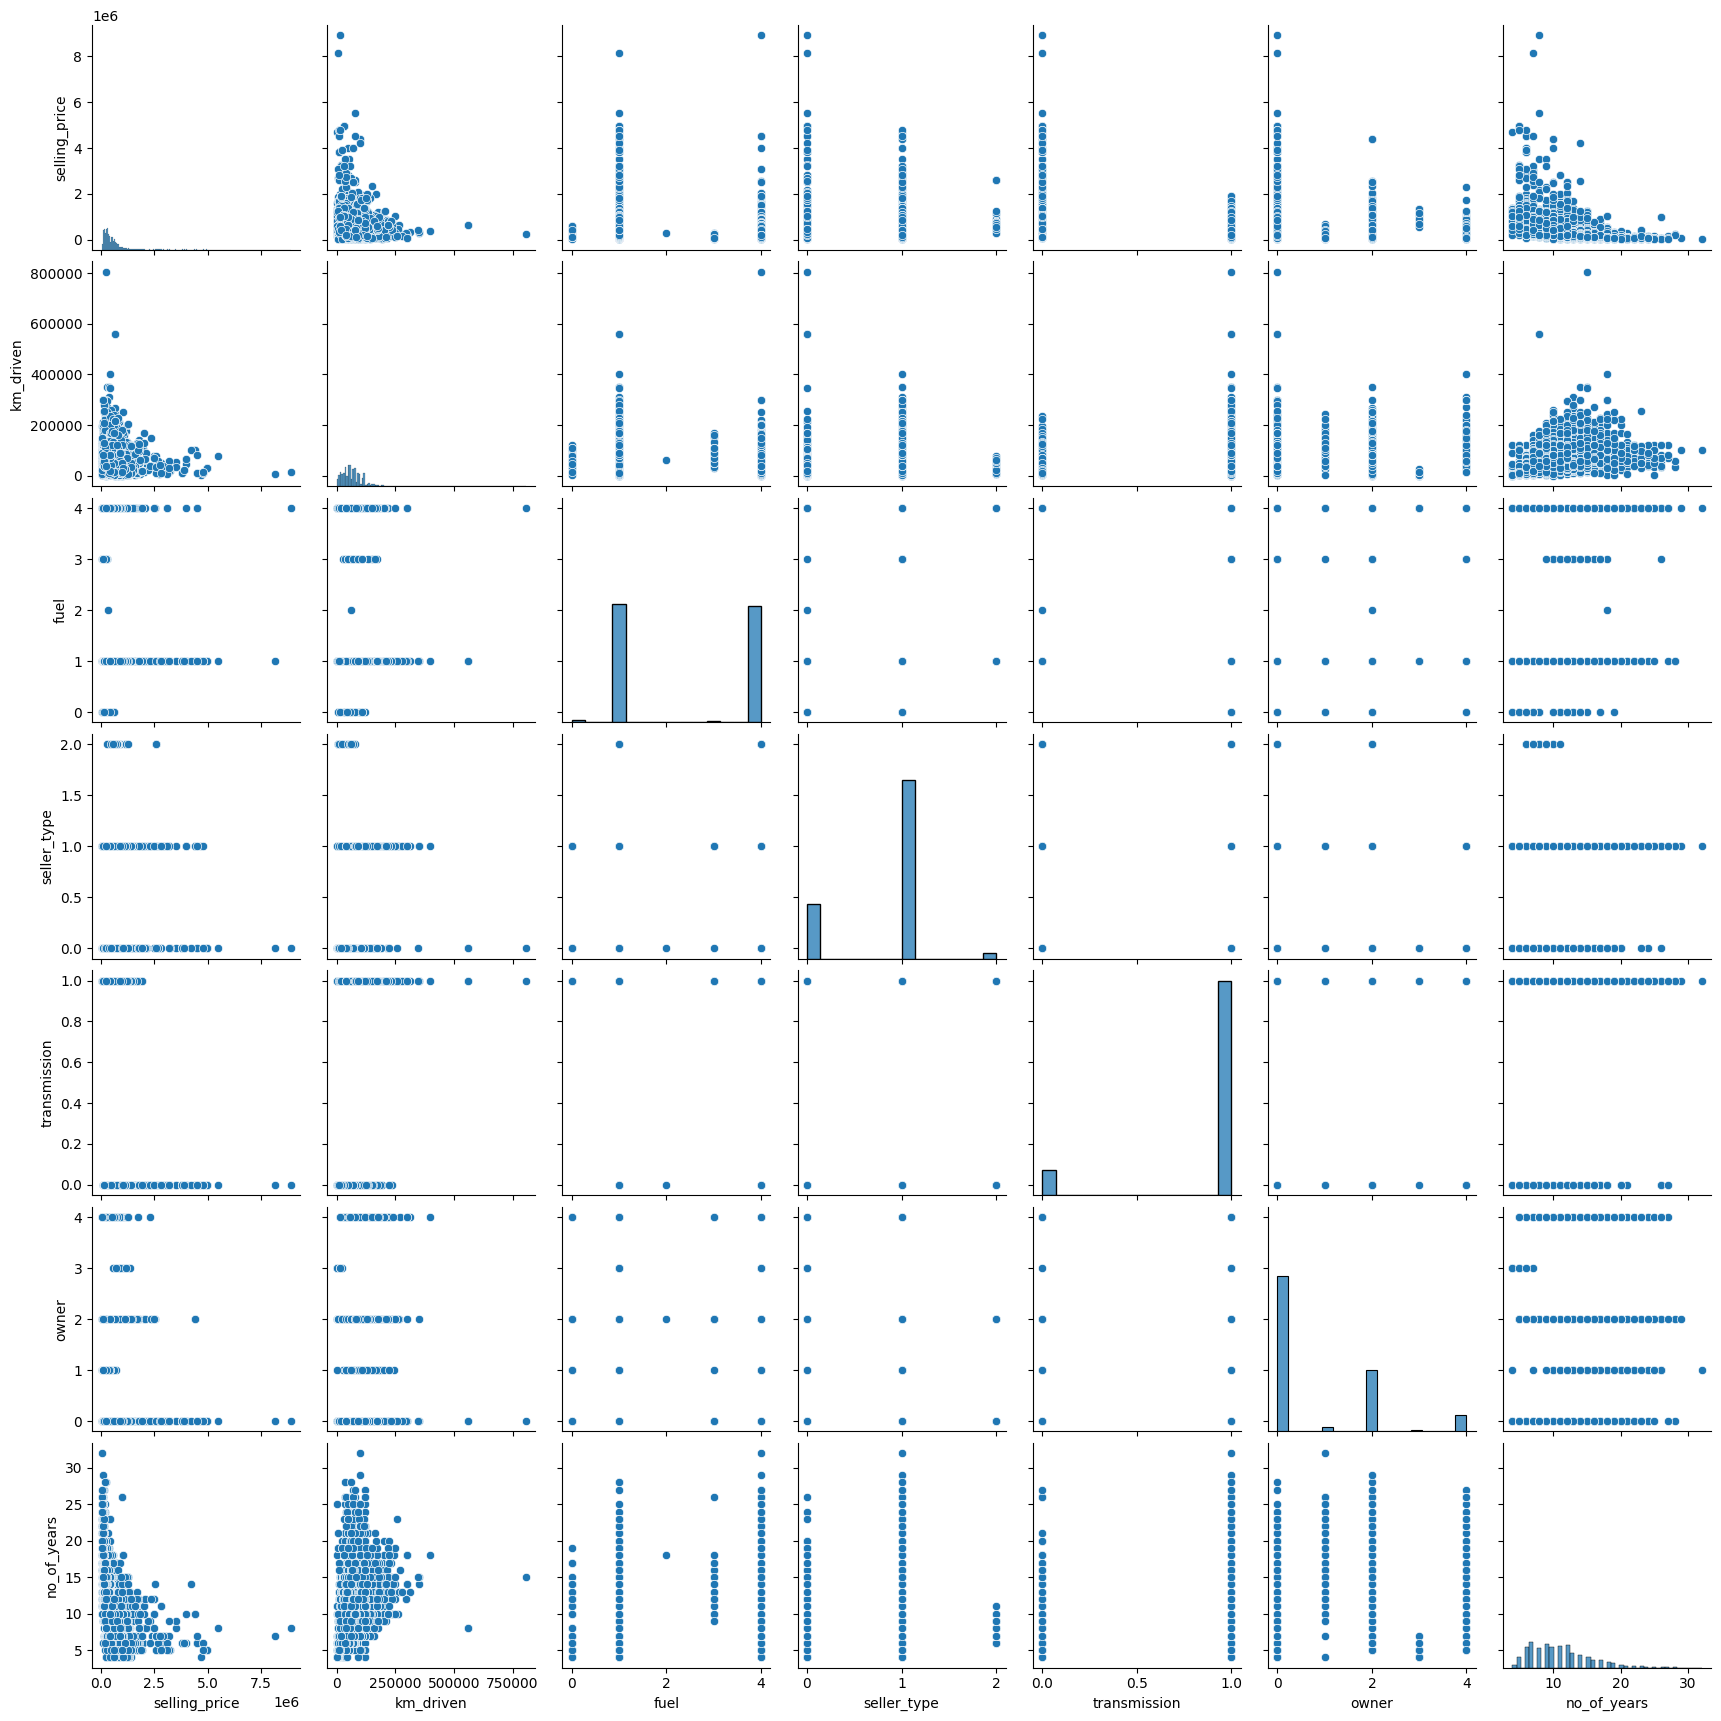

In [46]:
sns.pairplot(df)

<Axes: >

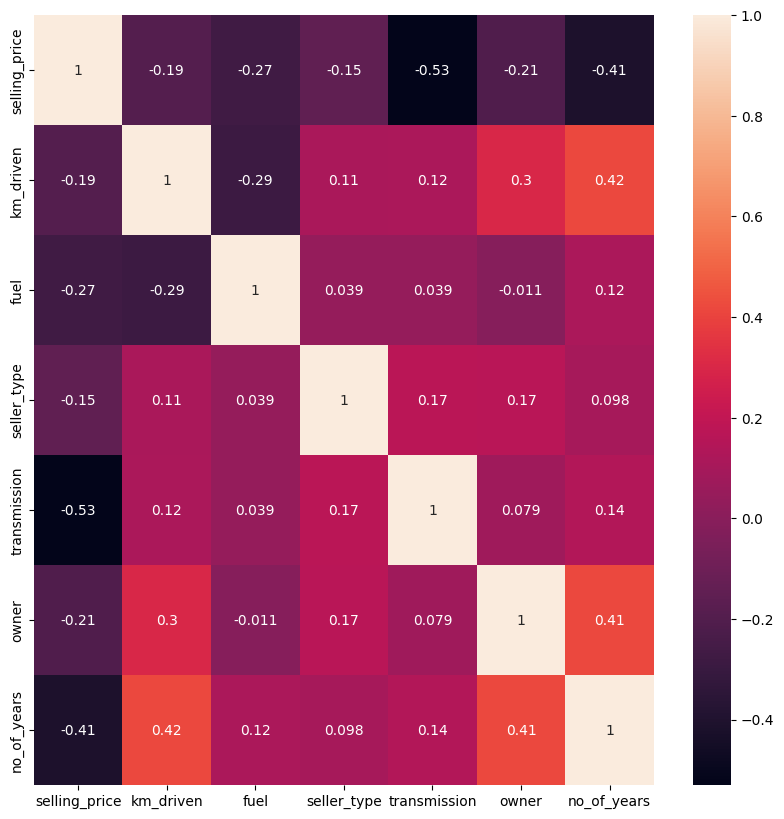

In [48]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(), annot=True)

# Select the features and targets

In [54]:
# X=np.array(df.drop('selling_price', axis=1))
# Y=np.array(df['selling_price'])

# X=np.array(df.iloc[:, 1:])
# Y=np.array(df.iloc[:,0])

X=(df.iloc[:, 1:])
Y=(df.iloc[:,0])

In [50]:
X

array([[ 70000,      4,      1,      1,      0,     17],
       [ 50000,      4,      1,      1,      0,     17],
       [100000,      1,      1,      1,      0,     12],
       ...,
       [ 83000,      4,      1,      1,      2,     15],
       [ 90000,      1,      1,      1,      0,      8],
       [ 40000,      4,      1,      1,      0,      8]])

# Feature Selection (Feature Importance)

In [51]:
from sklearn.ensemble import ExtraTreesRegressor

In [55]:
model=ExtraTreesRegressor()
feat_imp=model.fit(X,Y)

In [53]:
feat_imp.feature_importances_

array([0.24405429, 0.1290554 , 0.06230396, 0.29282836, 0.03041868,
       0.24133931])

<Axes: >

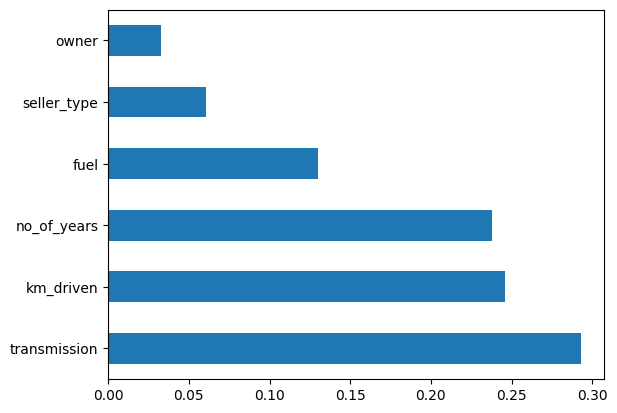

In [57]:
imp=pd.Series(feat_imp.feature_importances_, index=X.columns)
imp.nlargest(7).plot(kind='barh')

# splitting the data

In [58]:
X_train, X_test, Y_train, Y_test= train_test_split(X,Y, test_size=0.2, random_state=0)

In [59]:
X_test

,km_driven,fuel,seller_type,transmission,owner,no_of_years
2089,70070,1,0,0,0,12
1077,86000,1,0,0,0,11
1495,120000,4,1,1,4,10
555,30000,1,0,0,0,5
2615,95000,1,1,1,2,15
...,...,...,...,...,...,...
1359,102000,4,0,1,0,16
4197,120000,1,1,1,4,14
1818,42000,4,1,1,4,11
2644,60000,4,1,1,4,19


# Choosing the model

In [60]:
regressor=RandomForestRegressor()

# Hyper Parameter Tuning

In [82]:
n_estimators=[int(i) for i in np.linspace(start=100, stop=1200, num=12)]
max_features=['auto', 'sqrt']
max_depth=[int(i) for i in np.linspace(start=5, stop=30, num=6)]
min_sample_split=[2,5,10,15,100]
min_sample_leaf=[1,2,5,10]

In [83]:
random_grid={'n_estimators':n_estimators,
             'max_features':max_features,
             'max_depth':max_depth,
             'min_samples_split':min_sample_split,
             'min_samples_leaf':min_sample_leaf
             }
print(random_grid)

{'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200], 'max_features': ['auto', 'sqrt'], 'max_depth': [5, 10, 15, 20, 25, 30], 'min_samples_split': [2, 5, 10, 15, 100], 'min_samples_leaf': [1, 2, 5, 10]}


In [84]:
from sklearn.model_selection import RandomizedSearchCV

In [85]:
rf_regressor=RandomizedSearchCV(estimator=regressor,
                                param_distributions=random_grid,
                                scoring='neg_mean_squared_error',
                                cv=5,
                                verbose=2,
                                random_state=42,
                                n_jobs=1)

# Train the model

In [86]:
rf_regressor.fit(X_train, Y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   2.6s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   2.0s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   2.0s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   2.0s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   2.0s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=   3.6s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=   2.8s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimator

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=15, max_features=auto, min_samples_leaf=5, min_samples_split=100, n_estimators=300; total time=   1.0s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=15, max_features=auto, min_samples_leaf=5, min_samples_split=100, n_estimators=300; total time=   0.9s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=15, max_features=auto, min_samples_leaf=5, min_samples_split=100, n_estimators=300; total time=   0.9s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=15, max_features=auto, min_samples_leaf=5, min_samples_split=100, n_estimators=300; total time=   0.9s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=15, max_features=auto, min_samples_leaf=5, min_samples_split=100, n_estimators=300; total time=   0.9s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=15, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=400; total time=   1.5s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=15, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=400; total time=   1.5s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=15, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=400; total time=   1.5s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=15, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=400; total time=   1.7s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=15, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=400; total time=   2.1s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=20, max_features=auto, min_samples_leaf=10, min_samples_split=5, n_estimators=700; total time=   2.4s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=20, max_features=auto, min_samples_leaf=10, min_samples_split=5, n_estimators=700; total time=   2.4s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=20, max_features=auto, min_samples_leaf=10, min_samples_split=5, n_estimators=700; total time=   2.4s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=20, max_features=auto, min_samples_leaf=10, min_samples_split=5, n_estimators=700; total time=   2.4s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=20, max_features=auto, min_samples_leaf=10, min_samples_split=5, n_estimators=700; total time=   3.1s
[CV] END max_depth=25, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=1000; total time=   3.6s
[CV] END max_depth=25, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=1000; total time=   3.6s
[CV] END max_depth=25, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=1000; total time=   4.2s
[CV] END max_depth=25, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=1000; total time=   3.6s
[CV] END max_depth=25, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=1000; total time=   3.6s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=10, min_samples_split=15, n_estimators=1100; total time=   2.0s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=10, min_samples_split=15, n_estimators=1100; total time=   2.6s
[CV] END max_depth=5, max_feat

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=15, n_estimators=700; total time=   2.7s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=15, n_estimators=700; total time=   2.8s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=15, n_estimators=700; total time=   3.5s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=15, n_estimators=700; total time=   2.8s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=15, n_estimators=700; total time=   2.8s


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [88]:
rf_regressor.best_params_

{'n_estimators': 1100,
 'min_samples_split': 10,
 'min_samples_leaf': 2,
 'max_features': 'sqrt',
 'max_depth': 15}

# Testing the model

In [91]:
Y_pred=rf_regressor.predict(X_test)

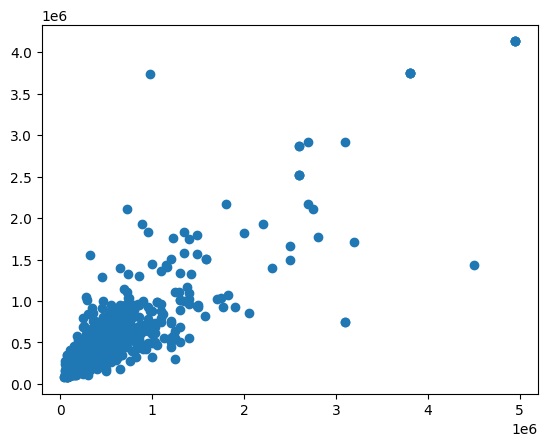

In [93]:
plt.scatter(Y_test, Y_pred)

In [94]:
target=pd.DataFrame({"Actual": Y_test, "Predicted": Y_pred})

Text(0, 0.5, 'Y_pred')

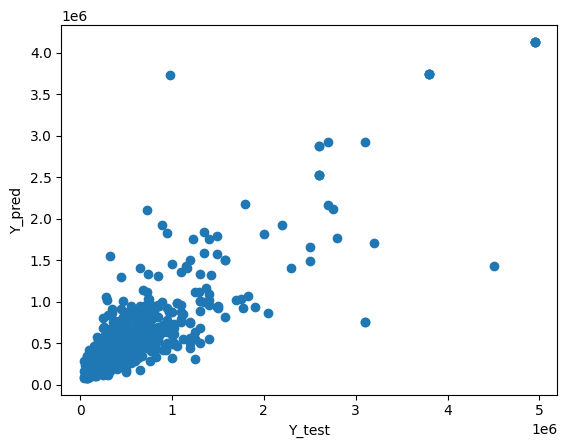

In [95]:
plt.scatter(Y_test, Y_pred)
plt.xlabel('Y_test')
plt.ylabel('Y_pred')

<Axes: >

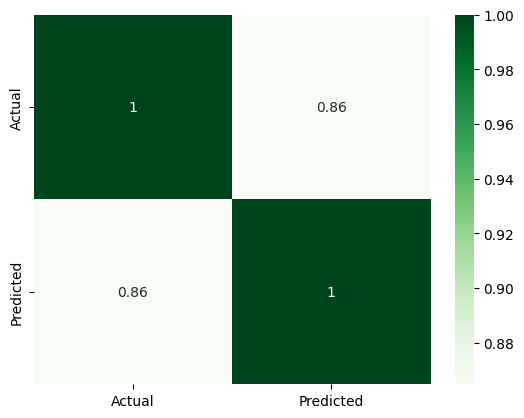

In [98]:
sns.heatmap(target.corr(), annot=True, cmap='Greens')

In [99]:
r2_score(Y_test, Y_pred)

0.7476381358669355

In [100]:
mean_squared_error(Y_test, Y_pred)

93714881769.69373

In [101]:
mean_absolute_error(Y_test, Y_pred)

169007.51514931762